### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Upload the data

In [2]:
all_data = pd.read_csv("./data.csv", encoding= 'unicode_escape')

In [3]:
all_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Clean up the data

#### Drop rows with NaN values

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = "all")
all_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Filter positive quantity values

In [5]:
all_data = all_data[all_data['Quantity'] > 0]

#### Reformat the InvoiceDate column

In [6]:
all_data['InvoiceDate'] = pd.to_datetime(all_data['InvoiceDate'])
all_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Add additional columns

#### Add a Sales column

In [7]:
all_data['Sales'] = all_data['UnitPrice'] * all_data['Quantity']
all_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Add a "YearMonth" column

In [8]:
all_data['YearMonth'] = all_data['InvoiceDate'].dt.month.astype(str) + '-' + all_data['InvoiceDate'].dt.year.astype(str)
all_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12-2010


### Perform Analysis

### Question 1: Which country had the highest number of sales?

In [9]:
results_country = all_data.groupby('Country').sum()
countries = [country for country, df in all_data.groupby(['Country'])]

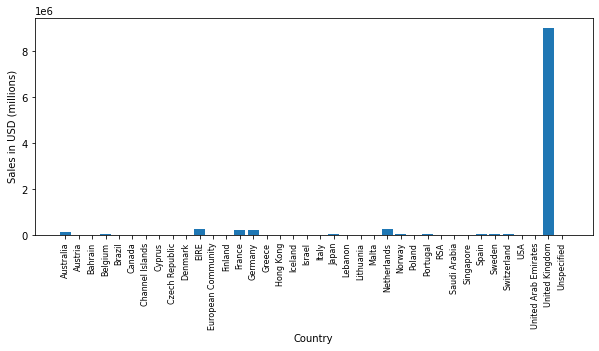

In [10]:
plt.figure(figsize=(10,4))
plt.bar(countries, results_country['Sales'])
plt.xticks(countries, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD (millions)')
plt.xlabel('Country')
plt.show()

Since this is a UK-based company, there is no doubt that the majority of the sales come from the UK with some transactions from countries in Europe such as France, Germany, and Ireland. This graph shows that the company should continue doubling down on the UK market. Should they want to expand to other markets, they can start with France, Ireland, and Germany where they already have footprints.

### Question 2: Which month had the highest sales? How much was earned that month?

In [11]:
results_month = all_data.groupby('YearMonth').sum()
months = [month for month, df in all_data.groupby(['YearMonth'])]

<function matplotlib.pyplot.show(close=None, block=None)>

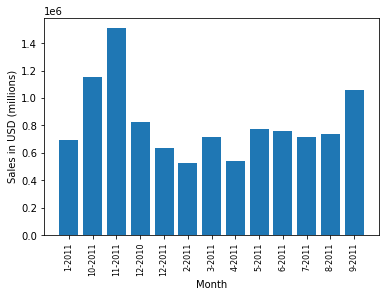

In [12]:
plt.bar(months, results_month['Sales'])
plt.xticks(months, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD (millions)')
plt.xlabel('Month')
plt.show

Since the company sells unique gifts, the highest performing months are understandbly September to November when there are Thanksgiving, Christmas, and other national holidays. Also, because many customers are wholesalers, they tend to purchase earlier to stock up. That is why the sales dropped during the actual month of Christmas. 

### Question 3: What time should we display advertisements to optimize conversion?

In [13]:
all_data['Hour'] = all_data['InvoiceDate'].dt.hour
hours = [hour for hour, df in all_data.groupby(['Hour'])]

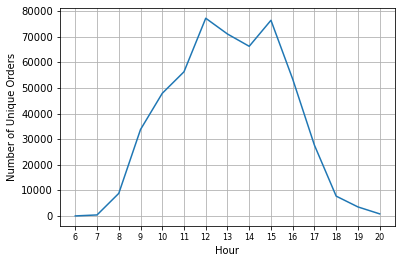

In [14]:
plt.plot(hours, all_data.groupby(['Hour']).count()['Sales'])
plt.xticks(hours, size = 8)
plt.ylabel('Number of Unique Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

Purchases surge around 12 pm and 3 pm, which means the optimal window for ad display is around 10 am to 3 pm. 

### Question 4: Which product sold the most?

In [17]:
all_data_quantity = all_data[['Description','Quantity']]
results_prod = all_data_quantity.groupby('Description').sum()
results_prod.sort_values(by=['Quantity'], ascending = False)
results_prod.nlargest(10,'Quantity')

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


The list of best-selling products is diverse and has no particular theme. The company can feature this list in the "Best-Seller" sections to achieve higher traction.

### Question 5: Who are the top spending customers?

In [24]:
all_data_cust = all_data[['CustomerID','Sales']]
results_cust = all_data_cust.groupby('CustomerID').sum()
results_cust.sort_values(by=['Sales'], ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results_cust.nlargest(100,'Sales'))

                Sales
CustomerID           
14646.0     280206.02
18102.0     259657.30
17450.0     194550.79
16446.0     168472.50
14911.0     143825.06
12415.0     124914.53
14156.0     117379.63
17511.0      91062.38
16029.0      81024.84
12346.0      77183.60
16684.0      66653.56
14096.0      65164.79
13694.0      65039.62
15311.0      60767.90
13089.0      58825.83
17949.0      58510.48
15769.0      56252.72
15061.0      54534.14
14298.0      51527.30
14088.0      50491.81
15749.0      44534.30
12931.0      42055.96
17841.0      40991.57
15098.0      39916.50
13798.0      37153.85
16013.0      37130.60
16422.0      34684.40
12748.0      33719.73
15838.0      33643.08
17404.0      31906.82
17389.0      31833.68
13098.0      28882.44
14680.0      28754.11
13081.0      28337.38
13408.0      28117.04
17857.0      26879.04
16333.0      26626.80
13777.0      25977.16
12753.0      21429.39
12744.0      21279.29
16210.0      21086.30
17675.0      20374.28
17381.0      20275.61
15039.0   

80% of the revenue comes from 20% of customers. The company can target these top buyers to further delight them with a customer loyalty program where these customers can gain early access to new product launches, special promotions, etc.

### Question 6: What products are most often sold together?

In [26]:
df = all_data[all_data['InvoiceNo'].duplicated(keep=False)]
df['Grouped'] = df.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))
df = df[['InvoiceNo', 'Grouped']].drop_duplicates()
df.head(10)

<ipython-input-26-5d3c59cfeeeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))


,InvoiceNo,Grouped
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
7,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
9,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
21,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
26,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
47,536372,"HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"
49,536373,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
66,536375,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
82,536376,"HOT WATER BOTTLE TEA AND SYMPATHY,RED HANGING ..."
84,536377,"HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"


In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('KEY FOB ', 'KEY FOB '), 802),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 613),
 (('KEY FOB ', ' BACK DOOR '), 587),
 (('KEY FOB ', ' SHED'), 549),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 542),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  527),
 (('KEY FOB ', ' FRONT  DOOR '), 478),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 466),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 455)]

Most commonly purchased pairs of products are the same type but in different colors such as jumbo bag pink polkadot or jumbo bag red retrospot because many customers are wholesalers, OR complementary products like key fob and back door. The company should (1) include diverse color options for the product lines and (2) input these complementary products to the recommendation algorithms to maximize revenue per order.